In [1]:
from finrl import config
from finrl import config_tickers
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [89]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.finrl_meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline , trx_plot
from pprint import pprint
import yfinance as yf
import sys
sys.path.append("../FinRL-Library")

import itertools

In [46]:
cryptocurrencies = ['BNB-USD','BTC-USD', 'ETH-USD', 'XRP-USD', 'LEO-USD', 'ETC-USD', 'FTT-USD', 'TRX-USD', 'BCH-USD', 'LINK-USD', 'ATOM-USD', 'LTC-USD', 'DAI-USD', 'CRO-USD', 'WBTC-USD', 'DOGE-USD', 'BUSD-USD', 'ADA-USD']

cryptos =['BTC-USD','ETH-USD','LTC-USD','XRP-USD']

In [47]:
df = YahooDownloader(start_date = '2016-01-01',
                     end_date = '2022-04-12',
                     ticker_list = cryptos).fetch_data()

[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (7820, 8)


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


In [48]:
df.sort_values(['date','tic'],ignore_index=True)

,date,open,high,low,close,volume,tic,day
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,36278900,BTC-USD,4
1,2016-01-01,3.479520,3.531020,3.469250,3.508980,2791170,LTC-USD,4
2,2016-01-02,434.622009,436.062012,431.869995,433.437988,30096600,BTC-USD,5
3,2016-01-02,3.515280,3.527120,3.492190,3.502160,3020260,LTC-USD,5
4,2016-01-03,433.578003,433.743011,424.705994,430.010986,39633800,BTC-USD,6
...,...,...,...,...,...,...,...,...
7815,2022-04-11,0.756422,0.756422,0.685738,0.695023,2367700413,XRP-USD,0
7816,2022-04-12,39533.714844,40617.585938,39388.328125,40127.183594,30991500854,BTC-USD,1
7817,2022-04-12,2981.420654,3077.452637,2957.872314,3030.376465,20235707410,ETH-USD,1
7818,2022-04-12,102.643730,105.672188,102.251740,104.828415,638546461,LTC-USD,1


In [55]:
fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list = config.INDICATORS,
    use_vix=True,
    use_turbulence=True,
    user_defined_feature = False)

processed = fe.preprocess_data(df)

/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/preprocessors.py:154: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1580, 8)
Successfully added vix


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Successfully added turbulence index


In [56]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [57]:
processed_full.sort_values(['date','tic'],ignore_index=True).tail(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
3150,2022-04-05,BTC-USD,46624.507812,47106.140625,45544.808594,45555.992188,2.964060e+10,1.0,1462.346140,49053.189158,39959.776857,54.704843,79.805158,19.037841,42801.582422,41979.362174,21.030001,0.403567
3151,2022-04-05,LTC-USD,124.859909,127.073303,123.195732,123.213173,6.625784e+08,1.0,3.588332,134.985423,110.997679,51.256004,57.391070,19.640228,116.861650,117.012063,21.030001,0.403567
3152,2022-04-06,BTC-USD,45544.355469,45544.355469,43193.953125,43206.738281,3.939340e+10,2.0,1164.955702,48898.719433,40339.782520,50.378882,26.111003,2.485850,42973.072396,42008.788411,22.100000,1.986538
3153,2022-04-06,LTC-USD,123.200035,123.248947,112.461334,112.461334,1.017954e+09,2.0,2.348116,134.644348,111.553864,46.169077,-7.869730,10.838142,117.314719,116.854473,22.100000,1.986538
3154,2022-04-07,BTC-USD,43207.500000,43860.699219,42899.906250,43503.847656,2.610197e+10,3.0,942.382679,48812.100946,40596.670148,50.886998,8.685587,4.787711,43131.958333,42026.978646,21.549999,0.079700
3155,2022-04-07,LTC-USD,112.471046,114.877831,111.465805,114.230194,6.358738e+08,3.0,1.490782,134.358698,112.050947,47.063211,-32.255002,13.034492,117.768471,116.634218,21.549999,0.079700
3156,2022-04-08,BTC-USD,43505.136719,43903.019531,42183.289062,42287.664062,2.721600e+10,4.0,660.245208,48804.664010,40613.808256,48.772173,-9.439748,10.303663,43142.116276,42001.101628,21.160000,0.399318
3157,2022-04-08,LTC-USD,114.238045,115.081619,110.618355,110.882065,7.476382e+08,4.0,0.535006,135.023018,110.837507,45.580747,-46.024492,14.941120,117.899803,116.197129,21.160000,0.399318
3158,2022-04-11,BTC-USD,42201.039062,42424.589844,39373.058594,39521.902344,3.394991e+10,0.0,-101.802195,48952.059368,40449.121101,44.312396,-87.221738,23.562781,43387.958464,41875.924219,24.370001,2.155241
3159,2022-04-11,LTC-USD,111.153145,111.153145,102.597687,102.607391,8.071939e+08,0.0,-1.814816,137.456974,105.667812,42.200410,-114.058541,28.432515,118.336642,114.818916,24.370001,2.155241


In [58]:
train = data_split(processed_full, '2016-01-01','2021-06-01')
trade = data_split(processed_full, '2020-06-01','2022-04-08')
print(len(train))
print(len(trade))

2722
938


In [59]:
train.tic.unique()

array(['BTC-USD', 'LTC-USD'], dtype=object)

In [60]:
trade.head(20)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-06-01,BTC-USD,9463.605469,10199.565430,9450.899414,10167.268555,3.519890e+10,0.0,251.501799,10088.223137,8695.663777,60.451570,134.055150,33.859705,9315.720312,8344.314860,28.230000,2.301635
0,2020-06-01,LTC-USD,45.574230,48.395439,45.425323,48.125233,3.035653e+09,0.0,0.458720,47.346920,41.139405,53.857856,103.271587,22.675500,44.733334,44.192972,28.230000,2.301635
1,2020-06-02,BTC-USD,10162.973633,10182.340820,9460.571289,9529.803711,3.913725e+10,1.0,238.627136,10101.328378,8708.540176,55.497052,83.259448,33.859705,9336.798145,8390.921802,26.840000,1.720572
1,2020-06-02,LTC-USD,48.094391,49.761257,45.261967,45.923515,3.060955e+09,1.0,0.484969,47.526992,41.238228,50.950701,95.716103,30.603723,44.655212,44.285712,26.840000,1.720572
2,2020-06-03,BTC-USD,9533.760742,9682.859375,9471.846680,9656.717773,2.500746e+10,2.0,235.944951,10090.642267,8711.525897,56.235789,54.506143,33.859705,9361.600260,8437.408309,25.660000,0.342537
2,2020-06-03,LTC-USD,45.929836,47.631241,45.663254,47.172894,2.691495e+09,2.0,0.599672,47.916868,41.171108,52.457169,90.728820,30.603723,44.645192,44.394001,25.660000,0.342537
3,2020-06-04,BTC-USD,9655.854492,9887.610352,9525.247070,9800.636719,2.592181e+10,3.0,242.635405,10135.783768,8713.628341,57.071730,79.225934,38.904702,9388.185807,8487.566764,25.809999,0.060146
3,2020-06-04,LTC-USD,47.200630,47.994480,46.575047,47.637596,2.697436e+09,3.0,0.719776,48.324316,41.244021,53.012451,113.431617,32.700715,44.673537,44.510125,25.809999,0.060146
4,2020-06-05,BTC-USD,9800.215820,9869.237305,9663.216797,9665.533203,2.350963e+10,4.0,234.334651,10157.801954,8720.462109,56.032367,73.849850,38.904702,9401.411523,8527.462630,24.520000,0.106356
4,2020-06-05,LTC-USD,47.674435,47.918568,46.870819,47.053146,2.551368e+09,4.0,0.759050,48.573609,41.378754,52.218941,105.587899,32.700715,44.710546,44.554492,24.520000,0.106356


In [61]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 2, State Space: 21


In [62]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [63]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [64]:
agent = DRLAgent(env = env_train)

In [75]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("ppo")

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device


In [76]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='ppo',
                                total_timesteps=50000)

day: 1360, episode: 40
begin_total_asset: 1000000.00
end_total_asset: 4053907.53
total_reward: 3053907.53
total_cost: 530224.29
total_trades: 2606
Sharpe: 0.771
-------------------------------------
| time/              |              |
|    fps             | 1948         |
|    iterations      | 1            |
|    time_elapsed    | 1            |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | -0.005614505 |
-------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1735        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006329643 |
|    clip_fraction        | 0.0598      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | -0.0011

In [77]:
data_risk_indicator = processed_full[(processed_full.date<'2021-01-01') & (processed_full.date>='2017-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [78]:
insample_risk_indicator.vix.describe()

count    1007.000000
mean       18.111787
std         9.624004
min         9.140000
25%        12.095000
50%        14.800000
75%        21.389999
max        82.690002
Name: vix, dtype: float64

In [79]:
insample_risk_indicator.vix.quantile(0.996)

71.85696002197265

In [91]:
#trade = data_split(processed_full, '2020-07-01','2021-10-31')
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-06-01,BTC-USD,9463.605469,10199.565430,9450.899414,10167.268555,3.519890e+10,0.0,251.501799,10088.223137,8695.663777,60.451570,134.055150,33.859705,9315.720312,8344.314860,28.23,2.301635
0,2020-06-01,LTC-USD,45.574230,48.395439,45.425323,48.125233,3.035653e+09,0.0,0.458720,47.346920,41.139405,53.857856,103.271587,22.675500,44.733334,44.192972,28.23,2.301635
1,2020-06-02,BTC-USD,10162.973633,10182.340820,9460.571289,9529.803711,3.913725e+10,1.0,238.627136,10101.328378,8708.540176,55.497052,83.259448,33.859705,9336.798145,8390.921802,26.84,1.720572
1,2020-06-02,LTC-USD,48.094391,49.761257,45.261967,45.923515,3.060955e+09,1.0,0.484969,47.526992,41.238228,50.950701,95.716103,30.603723,44.655212,44.285712,26.84,1.720572
2,2020-06-03,BTC-USD,9533.760742,9682.859375,9471.846680,9656.717773,2.500746e+10,2.0,235.944951,10090.642267,8711.525897,56.235789,54.506143,33.859705,9361.600260,8437.408309,25.66,0.342537


In [82]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym)

hit end!


In [92]:
env_trade

In [84]:
df_actions

,BTC-USD,LTC-USD
date,,
2020-06-01,14,12
2020-06-02,14,12
2020-06-03,14,12
2020-06-04,14,12
2020-06-05,11,11
...,...,...
2022-03-31,0,0
2022-04-01,0,0
2022-04-04,0,0


In [85]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          1.122776
Cumulative returns     3.058868
Annual volatility      0.681579
Sharpe ratio           1.446570
Calmar ratio           2.114977
Stability              0.634642
Max drawdown          -0.530869
Omega ratio            1.290171
Sortino ratio          2.254311
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.277881
Daily value at risk   -0.081958
dtype: float64


/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [86]:
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
    ticker="^DJI",
    start = df_account_value.loc[0,'date'],
    end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (468, 8)
Annual return          0.177319
Cumulative returns     0.354131
Annual volatility      0.158569
Sharpe ratio           1.111549
Calmar ratio           1.565939
Stability              0.814709
Max drawdown          -0.113235
Omega ratio            1.210233
Sortino ratio          1.551520
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.043453
Daily value at risk   -0.019278
dtype: float64


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (468, 8)


/Users/henriquerio/AI4Finance/FinRL/finrl/finrl_meta/preprocessor/yahoodownloader.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2020-06-01
End date,2022-04-07
Total months,22
,Backtest
Annual return,112.278%
Cumulative returns,305.887%
Annual volatility,68.158%
Sharpe ratio,1.45
Calmar ratio,2.11
Stability,0.63
Max drawdown,-53.087%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,53.09,2021-04-13,2021-07-20,2021-10-19,136
1,46.05,2021-11-08,2022-01-21,NaT,NaN
2,25.42,2021-01-08,2021-01-27,2021-02-08,22
3,17.13,2021-02-19,2021-02-26,2021-03-10,14
4,15.75,2020-08-17,2020-09-08,2020-10-21,48


/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'fl

Stress Events,mean,min,max
New Normal,0.39%,-13.90%,21.06%


/Users/henriquerio/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


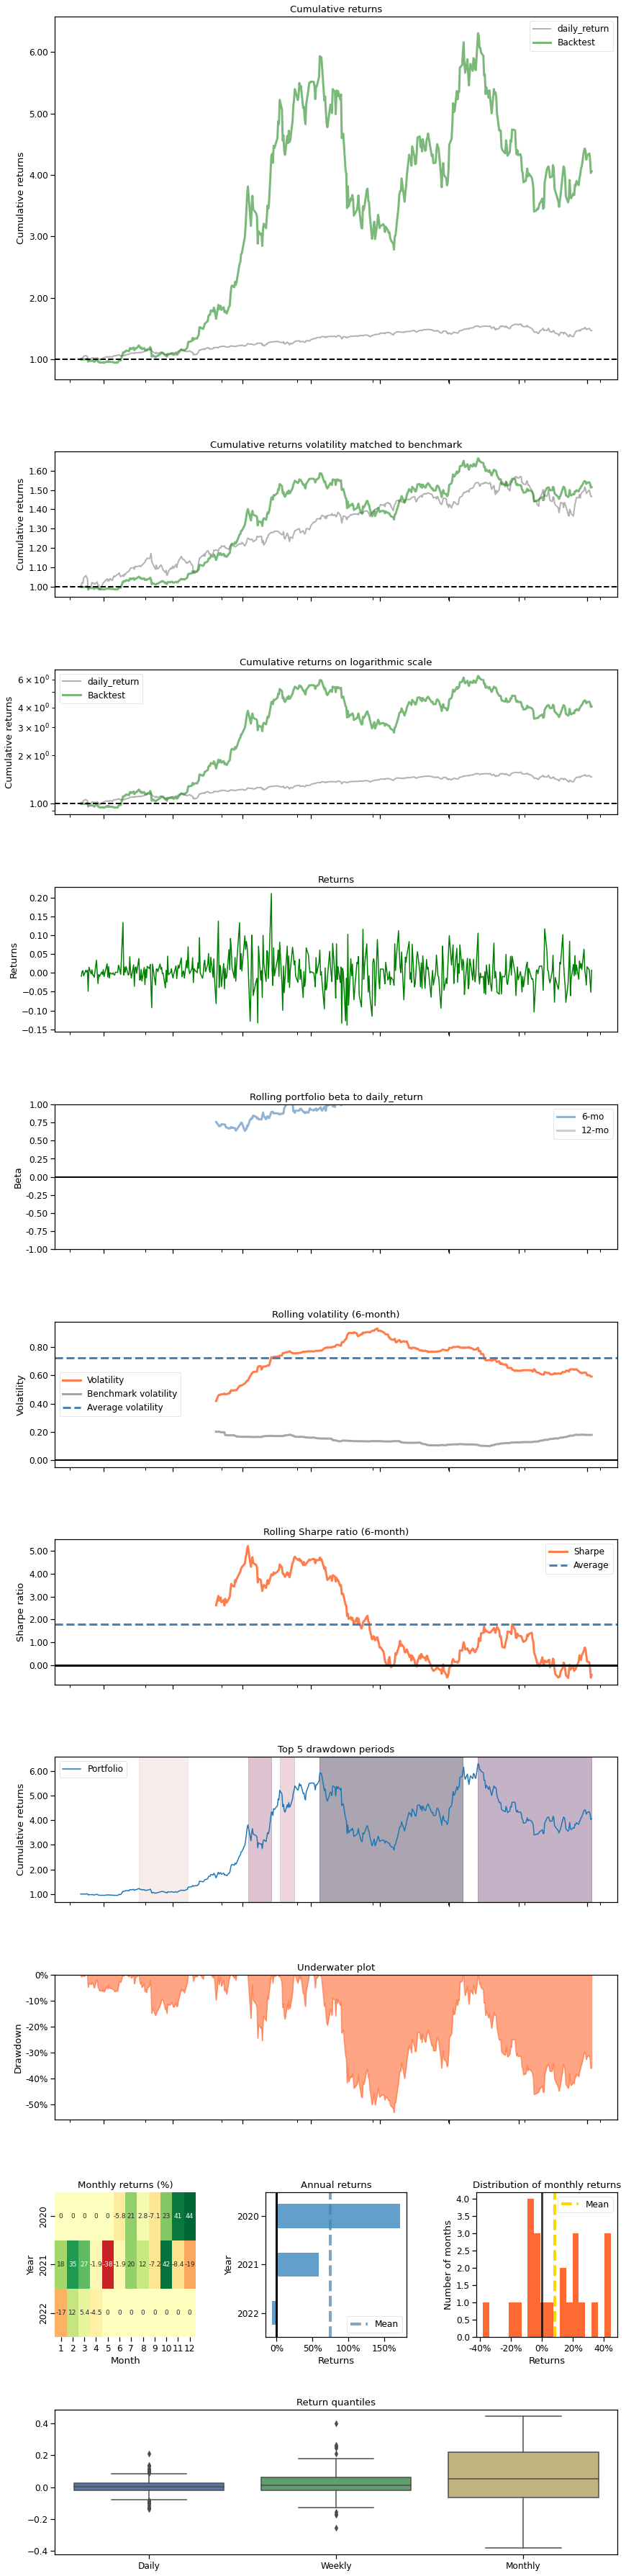

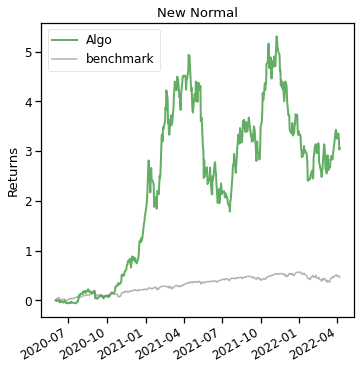

In [88]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value,
              baseline_ticker = '^GSPC',
              baseline_start = df_account_value.loc[0,'date'],
              baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

In [90]:
trx_plot(trade,df_actions,['BTC-USD','LTC-USD'])

KeyError: 'transactions'